In [3]:
import pandas as pd

df=pd.read_csv(r"C:\Users\user\Downloads\bank (1).csv")

print(df.head())

   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [7]:
df.describe()


,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [9]:
df.isnull().sum

<bound method DataFrame.sum of          age    job  marital  education  default  balance  housing   loan  \
0      False  False    False      False    False    False    False  False   
1      False  False    False      False    False    False    False  False   
2      False  False    False      False    False    False    False  False   
3      False  False    False      False    False    False    False  False   
4      False  False    False      False    False    False    False  False   
...      ...    ...      ...        ...      ...      ...      ...    ...   
11157  False  False    False      False    False    False    False  False   
11158  False  False    False      False    False    False    False  False   
11159  False  False    False      False    False    False    False  False   
11160  False  False    False      False    False    False    False  False   
11161  False  False    False      False    False    False    False  False   

       contact    day  month  duration  camp

In [11]:
categorical_cols = df.select_dtypes(include = 'object').columns
for col in categorical_cols:
    print(f"{col}:{df[col].unique()}")

job:['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital:['married' 'single' 'divorced']
education:['secondary' 'tertiary' 'primary' 'unknown']
default:['no' 'yes']
housing:['yes' 'no']
loan:['no' 'yes']
contact:['unknown' 'cellular' 'telephone']
month:['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome:['unknown' 'other' 'failure' 'success']
deposit:['yes' 'no']


In [13]:
df.replace("unknow",pd.NA,inplace = True)
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [19]:
df['job'].value_counts(dropna=False)

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64

In [21]:
df['deposit'].value_counts(normalize = True)

deposit
no     0.52616
yes    0.47384
Name: proportion, dtype: float64

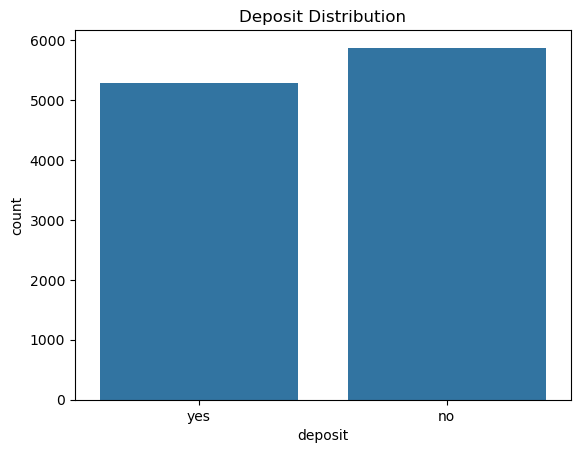

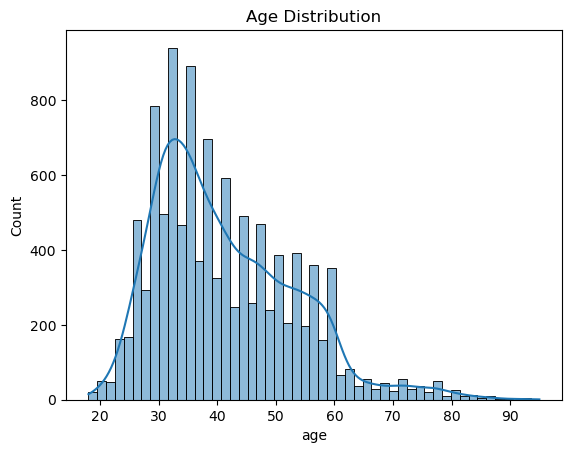

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='deposit', data=df)
plt.title('Deposit Distribution')
plt.show()

sns.histplot(df['age'],kde = True)
plt.title('Age Distribution')
plt.show()

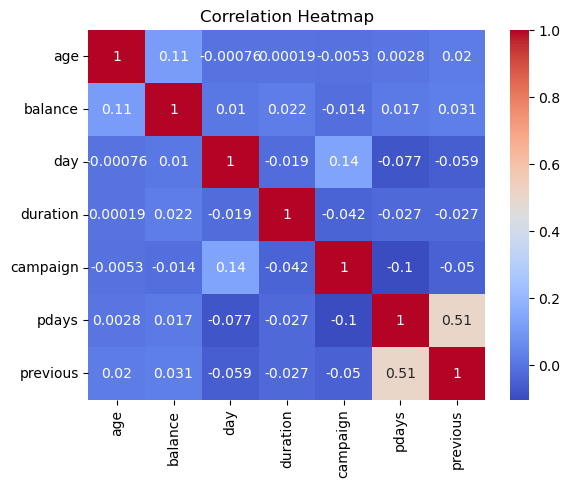

In [25]:
numeric_cols = df.select_dtypes(include='number').columns
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [31]:
df['deposit'] = df['deposit'].map({'yes': 1, 'no': 0})

In [33]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [35]:
X = df_encoded.drop('deposit', axis=1)
y = df_encoded['deposit']

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train_scaled, y_train)

y_pred = model_lr.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1502  260]
 [ 326 1261]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.84      1762
           1       0.83      0.79      0.81      1587

    accuracy                           0.83      3349
   macro avg       0.83      0.82      0.82      3349
weighted avg       0.83      0.83      0.82      3349



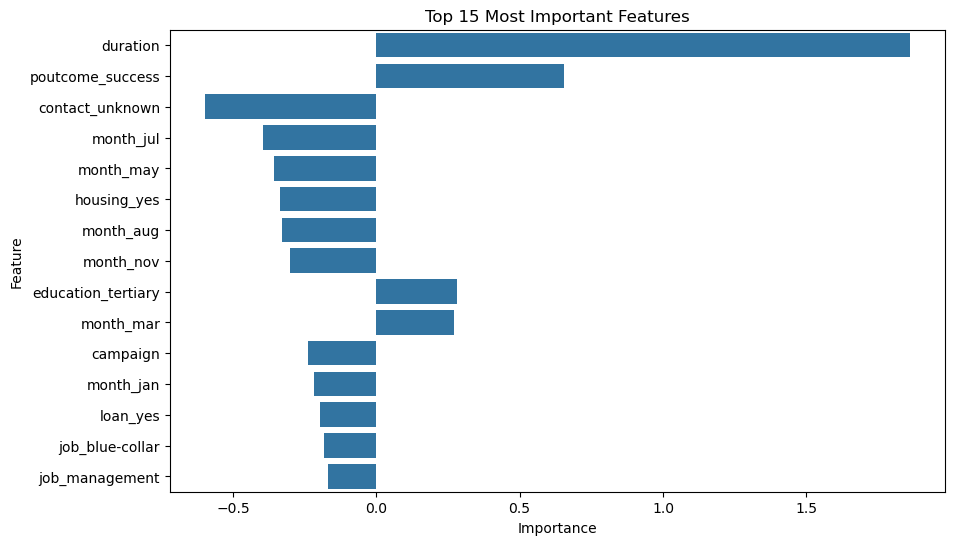

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = model_lr.coef_[0]  # για logistic regression
features = X.columns
coef_df = pd.DataFrame({'Feature': features, 'Importance': importances})
coef_df = coef_df.sort_values(by='Importance', key=abs, ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=coef_df.head(15))
plt.title('Top 15 Most Important Features')
plt.show()

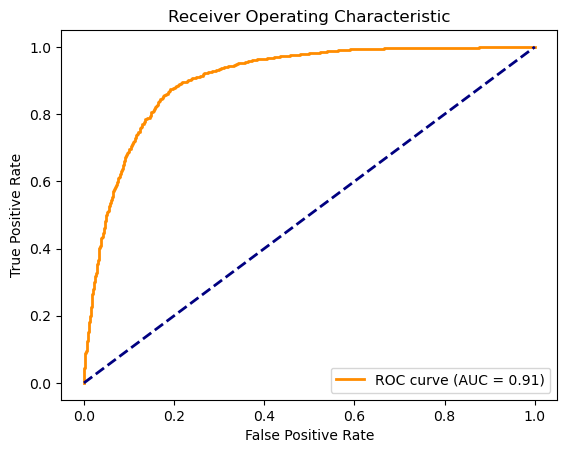

In [47]:
from sklearn.metrics import roc_curve, auc

y_probs = model_lr.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[1471  291]
 [ 188 1399]]
              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1762
           1       0.83      0.88      0.85      1587

    accuracy                           0.86      3349
   macro avg       0.86      0.86      0.86      3349
weighted avg       0.86      0.86      0.86      3349



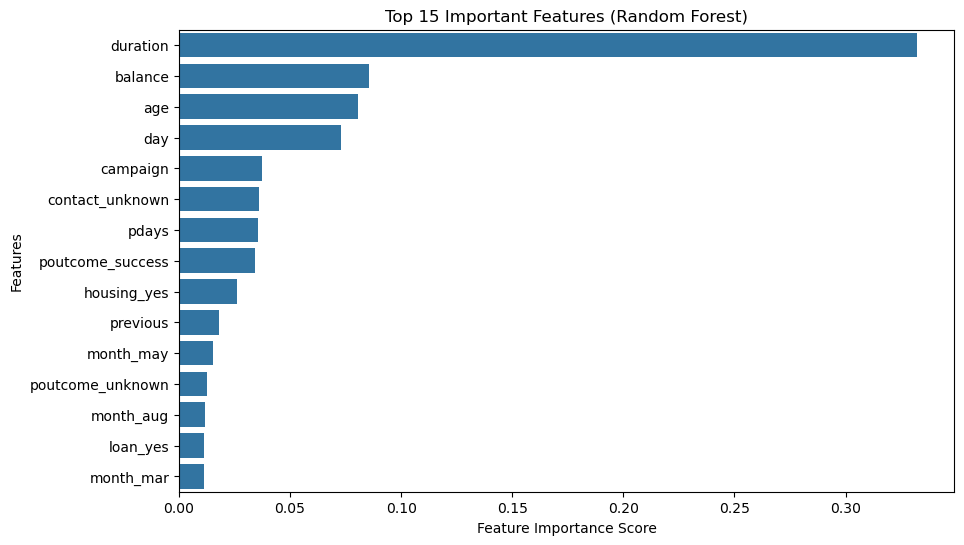

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
top_features = feature_importances.sort_values(ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.barplot(x=top_features, y=top_features.index)
plt.title("Top 15 Important Features (Random Forest)")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.show()

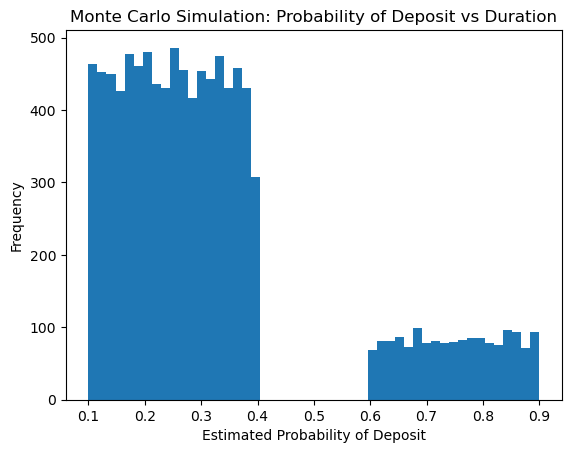

In [53]:
import numpy as np

simulations = 10000
durations = np.random.normal(loc=300, scale=100, size=simulations)  # mean 300s, std 100s

prob_deposit = []

for d in durations:
    if d > 400:
        prob_deposit.append(np.random.uniform(0.6, 0.9))
    else:
        prob_deposit.append(np.random.uniform(0.1, 0.4))

# RESULTS
import matplotlib.pyplot as plt

plt.hist(prob_deposit, bins=50)
plt.title('Monte Carlo Simulation: Probability of Deposit vs Duration')
plt.xlabel('Estimated Probability of Deposit')
plt.ylabel('Frequency')
plt.show()

In [55]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
y_pred_svm = svc.predict(X_test)

print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

[[1462  300]
 [ 584 1003]]
              precision    recall  f1-score   support

           0       0.71      0.83      0.77      1762
           1       0.77      0.63      0.69      1587

    accuracy                           0.74      3349
   macro avg       0.74      0.73      0.73      3349
weighted avg       0.74      0.74      0.73      3349



In [57]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

C:\Users\user\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [03:00:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[[1472  290]
 [ 210 1377]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.85      1762
           1       0.83      0.87      0.85      1587

    accuracy                           0.85      3349
   macro avg       0.85      0.85      0.85      3349
weighted avg       0.85      0.85      0.85      3349



In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.nlargest(15).plot(kind='barh')
plt.title("Top 15 Feature Importances (Random Forest)")
plt.show()

NameError: name 'rf' is not defined

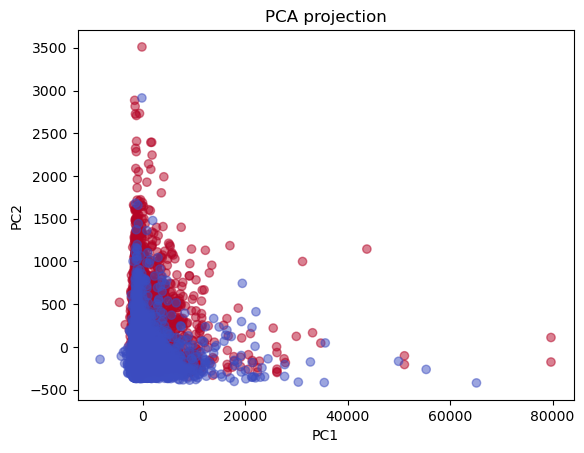

In [61]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.5)
plt.title('PCA projection')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()